## Observations and Insights

## Dependencies and starter code

In [1]:
# Import the various dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Pymaceutical_data/Mouse_metadata.csv"
study_results = "Pymaceutical_data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

study_results = pd.read_csv(study_results)
mouse_metadata.head()

# Combine the data into a single dataset
# Considering no join criteria was specified, I proceeded with an outer join
combined_df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table to ensure all columns are merged as expected
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats_df = combined_df.groupby(["Drug Regimen"])
regimen_stats_df.head()

# Generate a mean of the tumor volume for each regimen
regimen_mean = regimen_stats_df["Tumor Volume (mm3)"].mean()
regimen_mean

# Generate a median of the tumor volume for each regimen
regimen_median = regimen_stats_df["Tumor Volume (mm3)"].median()
regimen_median

# Generate a variance of the tumor volume for each regimen
regimen_var = regimen_stats_df["Tumor Volume (mm3)"].var()
regimen_var

# Generate a standard deviation of the tumor volume for each regimen
regimen_stdev = regimen_stats_df["Tumor Volume (mm3)"].std()
regimen_stdev

# Generate a SEM of the tumor volume for each regimen
regimen_sem = regimen_stats_df["Tumor Volume (mm3)"].sem()
regimen_sem

# Generate a summary statistics table ("dataframe" per grading rubric) of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# To limit the results to 2 decimal places, I have used the round function
summary_regimen_df = pd.DataFrame({
    "Mean": round(regimen_mean,2),
    "Median":round(regimen_median,2),
    "Variance":round(regimen_var,2),
    "Standard deviation":round(regimen_stdev,2),
    "SEM":round(regimen_sem,2)
})
summary_regimen_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

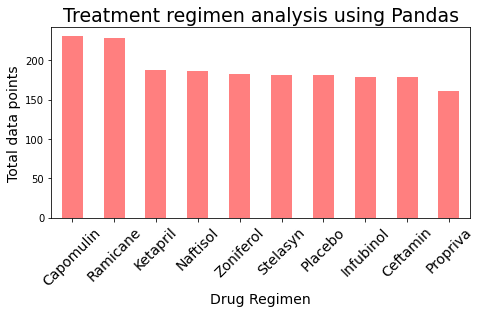

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = combined_df["Drug Regimen"].value_counts()

# Configure the plot and ticks
pandas_plot = data_points.plot(kind="bar", facecolor="red", alpha = .5,figsize=(7.5,3.5))
pandas_plot.set_xticklabels(data_points.index, fontsize = 14, rotation=45)

# Set the textual properties
pandas_plot.set_title("Treatment regimen analysis using Pandas", fontsize = 19)
pandas_plot.set_xlabel("Drug Regimen", fontsize = 14)
pandas_plot.set_ylabel("Total data points", fontsize = 14)

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

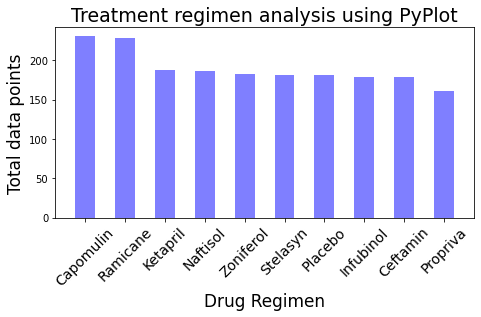

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Create the ticks for our bar chart's x axis
x_axis = (data_points)
# tick_locations = [value for value in x_axis]

# Configure the plot and ticks
pyplot_bar = data_points.plot(kind="bar", facecolor="blue", alpha = .5,figsize=(7.5,3.5))
pyplot_bar.set_xticklabels(data_points.index, fontsize = 14, rotation=45)

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)*1.05)

# Set the textual properties
plt.title("Treatment regimen analysis using PyPlot", fontsize = 19)
plt.xlabel("Drug Regimen", fontsize = 17)
plt.ylabel("Total data points", fontsize = 17)

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

## Pie plots

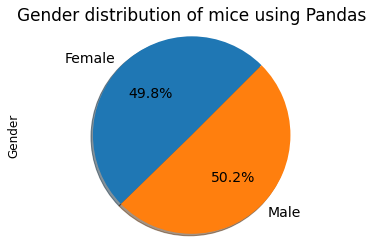

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group the data by the unique gender values and their corresponding counts as contained in the data set
gender_type = combined_df.groupby("Sex")
unique_gender = gender_type["Mouse ID"].nunique()

# Generate a pie chart and set the textual properties
pandas_pie_plot = unique_gender.plot(kind="pie", y = gender_type, shadow = True, autopct="%1.1f%%", startangle=45,fontsize =14)
plt.title("Gender distribution of mice using Pandas", fontsize = 17)
plt.ylabel("Gender", fontsize = 12)

# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

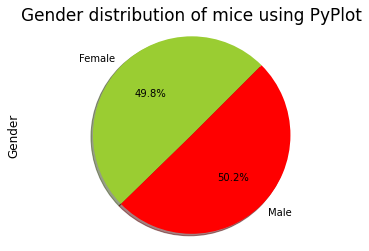

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["yellowgreen","red"]
# Due to the dataset only having 2 sections, I am not using the explode features

# Generate a pie chart and set the textual properties
plt.pie(unique_gender, colors = colors, labels = unique_gender.index, shadow=True, autopct="%1.1f%%", startangle=45)
plt.title("Gender distribution of mice using PyPlot", fontsize = 17)
plt.ylabel("Gender", fontsize = 12)

# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
df = study_results
df.sort_values('Mouse ID',ascending=True,inplace=True)
df.drop_duplicates(subset =['Mouse ID'],keep='last',inplace=True)
iqr_df = df.merge(mouse_metadata,on="Mouse ID")

# Create a list of the four drugs we've been instructed to examine
top_four_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Calculate quartiles for each drug and publish results
for drug in top_four_drugs:
    drug_regimen = iqr_df[iqr_df["Drug Regimen"] == drug]
    tumor_volume = drug_regimen["Tumor Volume (mm3)"]
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=")
    print(f"{drug} treatment regimen analysis:")
    print(f"The lower quartile is {round(lowerq,2)}")
    print(f"The upper quartile is {round(upperq,2)}")
    print(f"The interquartile range is {round(iqr,2)} ")
    
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    print(f"Values below {round(lower_bound,2)} are potential outliers.")
    print(f"Values above {round(upper_bound,2)} are potential outliers.")
print(f"=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=")

=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=
Capomulin treatment regimen analysis:
The lower quartile is 36.04
The upper quartile is 44.02
The interquartile range is 7.98 
Values below 24.07 are potential outliers.
Values above 56.0 are potential outliers.
=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=
Ramicane treatment regimen analysis:
The lower quartile is 37.75
The upper quartile is 45.0
The interquartile range is 7.25 
Values below 26.88 are potential outliers.
Values above 55.87 are potential outliers.
=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=
Infubinol treatment regimen analysis:
The lower quartile is 48.95
The upper quartile is 55.65
The interquartile range is 6.7 
Values below 38.9 are potential outliers.
Values above 65.7 are potential outliers.
=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=
Ceftamin treatment regimen analysis:
The lower quartile is 46.37
The upper quartile is 54.95
The interquartile range is 8.58 
Values below 33.5 are potential outliers.
Values above 67.82 are 

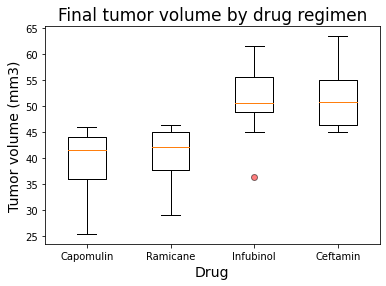

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume = []

for drug in top_four_drugs:
    drug_regimen = iqr_df[iqr_df["Drug Regimen"] == drug]
    tumor_volume = drug_regimen["Tumor Volume (mm3)"]
    final_tumor_volume.append(tumor_volume)

# Generate a box plot and set the textual properties    
red_diamond = dict(markerfacecolor="r", marker="o", alpha=0.5)
plt.boxplot(final_tumor_volume, whis= 1.5, labels=top_four_drugs, flierprops=red_diamond)
plt.title ("Final tumor volume by drug regimen" , fontsize=17)
plt.ylabel("Tumor volume (mm3)", fontsize = 14)
plt.xlabel("Drug", fontsize = 14)

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

## Line and scatter plots

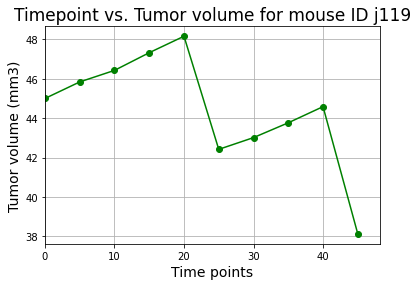

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Read, import and merge data files to reset the combined_df
mouse_metadata = "Pymaceutical_data/Mouse_metadata.csv"
study_results = "Pymaceutical_data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
combined_df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

capomulin_regimen = combined_df[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_regimen["Mouse ID"].unique()
unique_mouse = capomulin_regimen[capomulin_regimen["Mouse ID"] == capomulin_mice[16]]

# Generate a line plot and set the textual properties    
plt.plot(unique_mouse["Timepoint"], unique_mouse["Tumor Volume (mm3)"], marker = "o", color="green")
plt.title("Timepoint vs. Tumor volume for mouse ID " +capomulin_mice[16], fontsize=17)
plt.xlabel("Time points", fontsize=14)
plt.xlim(0,unique_mouse["Tumor Volume (mm3)"].max())
plt.ylabel("Tumor volume (mm3)", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

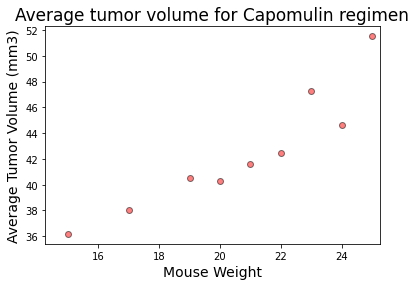

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
mice_weights = capomulin_regimen['Weight (g)'].unique()
average_tumor_volume = []

for weight in mice_weights:
    weight_range = combined_df[combined_df["Weight (g)"] == weight]
    average_tumor_weight = weight_range["Tumor Volume (mm3)"].mean()
    average_tumor_volume.append(average_tumor_weight)

# Generate a scatter plot and set the textual properties    
plt.scatter(mice_weights,average_tumor_volume, marker="o", facecolors="red", alpha = .5, edgecolors="black")
plt.title("Average tumor volume for Capomulin regimen",fontsize=17)
plt.xlabel("Mouse Weight",fontsize=14)
plt.xlim(mice_weights.min()-.75,mice_weights.max() +.25)
plt.ylabel("Average Tumor Volume (mm3)",fontsize=14)

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=
The correlation coefficient between mouse weight and average tumor volume is 0.92
=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=


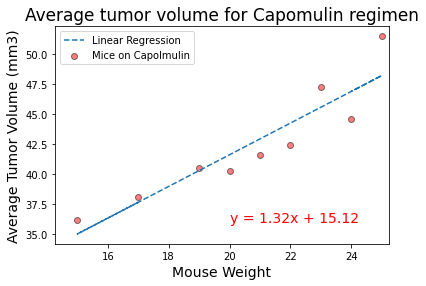

<Figure size 432x288 with 0 Axes>

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Define variables for correlation calculations
mouse_weight = capomulin_regimen["Weight (g)"].unique()

# Calculate the correlation and publish the result
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=")
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")
print(f"=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=:=")

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot and set the textual properties    
plt.scatter(mouse_weight,average_tumor_volume, marker="o", facecolors="red", alpha = .5, edgecolors="black", label="Mice on Capolmulin")
plt.annotate(line_eq,(20,36),fontsize=14,color="red")
plt.plot(mouse_weight,regress_values,"--", label="Linear Regression")
plt.xlabel("Mouse Weight",fontsize=14)
plt.xlim(mice_weights.min()-.75,mice_weights.max() +.25)
plt.title("Average tumor volume for Capomulin regimen",fontsize=17)
plt.ylabel("Average Tumor Volume (mm3)",fontsize=14)
plt.legend(loc="best")

# Show the plot
plt.show()

# Resize the plot
plt.tight_layout()

## Analysis and observations

The study had almost identical number of female and male mice. It is unclear if the gender of the mice plays any role in how they react to the treatment.

The Capomulin regimen was found to be effective in reducing the average tumor volume in mice over a 45 day period.

Both Capomulin and Ramicane regimens appeared to be equally effective based on the average final tumor volume.

There is a positive correlation between the mouse weight and average tumor volume.